May 31, 2023

Now that we have all the functionality we need to compute the std. error using MC sampling, we can redo the figures from `Process-HW-Results.ipynb`

In [1]:
import pennylane as qml
import scipy

from processing_functions import *
from std_error_helpers import *

np.set_printoptions(precision=4)

In [2]:
# import the raw results
from raw_results_o18 import H_tapered as H_tapered_o18
from raw_results_o18 import job_results as job_results_o18

from raw_results_o20 import H_tapered as H_tapered_o20
from raw_results_o20 import job_results as job_results_o20

from raw_results_o22 import H_tapered as H_tapered_o22
from raw_results_o22 import job_results as job_results_o22

from raw_results_o24 import H_tapered as H_tapered_o24
from raw_results_o24 import job_results as job_results_o24

from raw_results_o26 import H_tapered as H_tapered_o26
from raw_results_o26 import job_results as job_results_o26
    
# import the zne results files
from raw_results_o20_zne import H_tapered as H_tapered_o20_zne
from raw_results_o20_zne import job_results as job_results_o20_zne

from raw_results_o22_zne import H_tapered as H_tapered_o22_zne
from raw_results_o22_zne import job_results as job_results_o22_zne

from raw_results_o24_zne import H_tapered as H_tapered_o24_zne
from raw_results_o24_zne import job_results as job_results_o24_zne

In [3]:
ideal_energies = np.array([-10.853163, -21.4836622, -32.722017, -43.905568, -40.1021559])

Load the HW results, create the distribution objects for MC sampling, resample the results, and compute the std. error.

In [4]:
# no. of shots for sampling from a single distribution object 
shots = 1000

# no. of times to independently sample from the distribution objects i.e. H_1,
# H_2, ..., H_N to give use many estimates of the expval to compute the std.
# error with
n_mc_samples = 100

In [5]:
raw_expval = []
zne_expval = []
raw_std_error = []
zne_std_error = []

raw_results_list = [
    (H_tapered_o18, job_results_o18),
    (H_tapered_o20, job_results_o20),
    (H_tapered_o22, job_results_o22),
    (H_tapered_o24, job_results_o24),
    (H_tapered_o26, job_results_o26)
]

zne_results_list = [
    (H_tapered_o18, job_results_o18),
    (H_tapered_o20_zne, job_results_o20_zne),
    (H_tapered_o22_zne, job_results_o22_zne),
    (H_tapered_o24_zne, job_results_o24_zne),
    (H_tapered_o26, job_results_o26)
]

In [6]:
for raw_result in raw_results_list:
    # unpack the tuple
    H_tapered, job_results = raw_result
    
    # create the distribution objects for MC sampling for each group of Pauli words
    job_dists = []
    for idx in range(len(job_results)):
        job_dists.append(hist_to_dist(job_results[idx]['histogram']))
    
    # simulate the HW results multiple times to obtain different expval estimates
    sim_job_results = []
    for i in range(n_mc_samples):
        sim_job_results.append(
            simulate_job_results(job_dists, shots=shots, seed=42)
        )

    # compute the expvals for different MC simulated runs
    h_estimates = []
    for i in range(n_mc_samples):
        h_expval, _ = compute_expal_and_std(
            H_tapered, sim_job_results[i], shots=shots)
        h_estimates.append(h_expval)
    
    # compute the mean expval and std. err.
    expval, std_error = compute_mean_and_std_dev(h_estimates)
    raw_expval.append(expval)
    raw_std_error.append(std_error.item())

repeat the above but for the zne_results

In [7]:
# repeat the above
for zne_result in zne_results_list:
    # unpack the tuple
    H_tapered, job_results = zne_result
    
    # create the distribution objects for MC sampling for each group of Pauli words
    job_dists = []
    for idx in range(len(job_results)):
        job_dists.append(hist_to_dist(job_results[idx]['histogram']))
    
    # simulate the HW results multiple times to obtain different expval estimates
    sim_job_results = []
    for i in range(n_mc_samples):
        sim_job_results.append(
            simulate_job_results(job_dists, shots=shots, seed=42)
        )

    # compute the expvals for different MC simulated runs
    h_estimates = []
    for i in range(n_mc_samples):
        h_expval, _ = compute_expal_and_std(
            H_tapered, sim_job_results[i], shots=shots)
        h_estimates.append(h_expval)
    
    # compute the mean expval and std. err.
    expval, std_error = compute_mean_and_std_dev(h_estimates)
    zne_expval.append(expval)
    zne_std_error.append(std_error.item())

In [8]:
raw_expval, raw_std_error

([-10.545801343500003,
  -18.041195783699997,
  -25.530380777399998,
  -35.8352020971,
  -38.5522984472],
 [0.2167024835333496,
  0.3496568694188539,
  0.3838005201213229,
  0.35692610314765416,
  0.23538072812058447])

In [9]:
zne_expval, zne_std_error

([-10.494962940599999,
  -15.120882902200002,
  -19.4707847689,
  -23.468357788200002,
  -38.59752444670001],
 [0.2398677747297968,
  0.4006294946265852,
  0.5021778023765325,
  0.4026960593273762,
  0.2128112651627358])

Do the same processing as the `Process-HW-Results.ipynb` notebook

In [10]:
ideal_energies = np.array([-10.853163, -21.4836622, -32.722017, -43.905568, -40.1021559])

hw_energies = np.zeros((5, 2))
hw_energies[:,0] = raw_expval
hw_energies[:,1] = zne_expval

raw_stds = qml.math.squeeze(raw_std_error)
zne_stds = qml.math.squeeze(zne_std_error)

In [11]:
raw_std_error, raw_stds
zne_std_error, zne_stds

([0.2398677747297968,
  0.4006294946265852,
  0.5021778023765325,
  0.4026960593273762,
  0.2128112651627358],
 array([0.2399, 0.4006, 0.5022, 0.4027, 0.2128]))

In [12]:
# Compute the stdiance of the error-mitigation value; linear combination
extrapolated_stds = np.sqrt((9/4) * np.array(raw_stds) ** 2 + (1/4) * np.array(zne_stds) ** 2)

# Replace the original values because we didn't do mitigation for them
extrapolated_stds[0] = raw_stds[0]
extrapolated_stds[-1] = raw_stds[-1]

In [13]:
extrapolated_stds

tensor([0.2167, 0.5614, 0.6281, 0.572 , 0.2354], requires_grad=True)

In [17]:
hw_energies

tensor([[-10.5458, -10.495 ],
        [-18.0412, -15.1209],
        [-25.5304, -19.4708],
        [-35.8352, -23.4684],
        [-38.5523, -38.5975]], requires_grad=True)

In [18]:
hw_energies[1]

tensor([-18.0412, -15.1209], requires_grad=True)

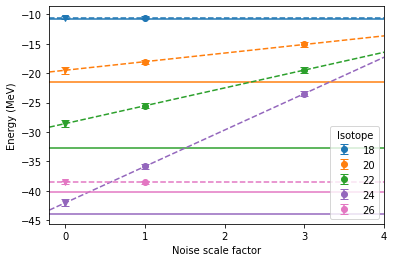

In [22]:
isotopes = [18, 20, 22, 24, 26]
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:pink']
zne_values = []
folds = np.array([1, 3])
fold_values = np.linspace(-0.2, 4, 100)

for idx, isotope in enumerate(isotopes):
    # Plot the HW values

    if isotope not in [18, 26]:
        plt.errorbar(folds, hw_energies[idx], yerr=[raw_stds[idx], zne_stds[idx]], 
                     fmt="o", capsize=4, label=isotope, c=colours[idx])

        # Compute the fit and plot the line and the intercept
        res = scipy.stats.linregress(folds, hw_energies[idx])
        plt.errorbar([0], [res.intercept], yerr=extrapolated_stds[idx], fmt="v", capsize=4, c=colours[idx])
        plt.plot(
            fold_values, res.intercept + res.slope * fold_values, 
            c=colours[idx], linestyle="--"
        )
        zne_values.append(res.intercept)
    else:
        plt.errorbar([0], [hw_energies[idx][0]], yerr=raw_stds[idx], fmt="v", capsize=4, c=colours[idx])
        plt.errorbar([1], [hw_energies[idx][0]], yerr=raw_stds[idx], fmt="o", capsize=4, c=colours[idx], label=isotope)
        plt.axhline(y=hw_energies[idx][0], c=colours[idx], linestyle="--")
        zne_values.append(hw_energies[idx][0])
        
    plt.axhline(y=ideal_energies[idx], c=colours[idx])

plt.xticks([0, 1, 2, 3, 4])
plt.xlim(-0.2, 4)
plt.xlabel("Noise scale factor") 
plt.ylabel("Energy (MeV)")
plt.legend(title="Isotope")
#plt.title("Noise-extrapolated hardware results from IonQ device")        
plt.savefig("aria-results-zne.pdf")

In [18]:
folds + offsets[0]

tensor([0.8, 2.8], requires_grad=True)

In [15]:
extrapolated_stds

tensor([0.2126, 0.592 , 0.6317, 0.4963, 0.2392], requires_grad=True)

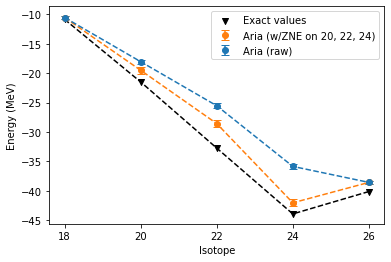

In [23]:
plt.figure(figsize=(6, 4))

plt.errorbar(isotopes, zne_values, yerr=extrapolated_stds, capsize=4, fmt="o", 
             label="Aria (w/ZNE on 20, 22, 24)", c="tab:orange")
plt.plot(isotopes, zne_values, linestyle="--", c="tab:orange")

plt.errorbar(isotopes, hw_energies[:, 0], yerr=raw_stds, capsize=4, fmt="o", 
             label="Aria (raw)", c="tab:blue")
plt.plot(isotopes, hw_energies[:, 0], linestyle="--", c="tab:blue")

plt.scatter(isotopes, ideal_energies, label="Exact values", c="black", marker="v")
plt.plot(isotopes, ideal_energies, linestyle="--", c="black")

plt.ylabel("Energy (MeV)")
plt.xlabel("Isotope")
plt.xticks(isotopes)
plt.legend()
#plt.title("Oxygen drip line evaluation")
plt.savefig("hw-dripline-plot.pdf")